In [61]:
#############################################################################
# Light curves download and Audio files generation for a mockup application #
# Cepheid                                                                   #
# Hesperia Cluster team, at Madrid NASA Space Apps Challenge - 2022         #
#############################################################################

# Kepler & TESS time series analysis, by Lightkurve Collaboration
import lightkurve as lk

# Scatterplot Sonification Package, by Locke Patton and Emily Levesque
from sonipy.sonify import SonifyTool

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [46]:
# ***** INTRINSIC PULSATING CEPHEID ******

# Cepheid Beta Doradus (HD 37350)
star_id = 'HD 37350'

# Query Kepler/K2 and download light_curve
pixel_file = lk.search_targetpixelfile('HD 37350')[0].download()
light_curve = pixel_file.to_lightcurve().remove_outliers()
# Compute period
period = light_curve.to_periodogram().period_at_max_power
print("Period: " + str(period))


Period: 9.957420956364931 d


In [34]:
# Get 1 period of data and start time at 0
flux_axis = light_curve.flux.value
time_axis = light_curve.time.value - light_curve.time.value[0]
time_axis_period = [x for x in time_axis if x<=period.value]
flux_axis_period = flux_axis[:len(time_axis_period)]


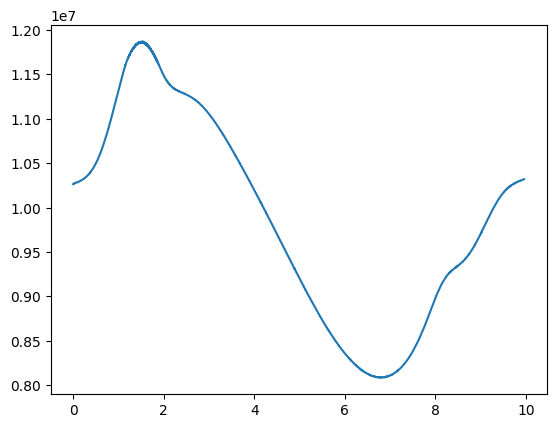

In [36]:
plt.plot(time_axis_period, flux_axis_period)
plt.show()


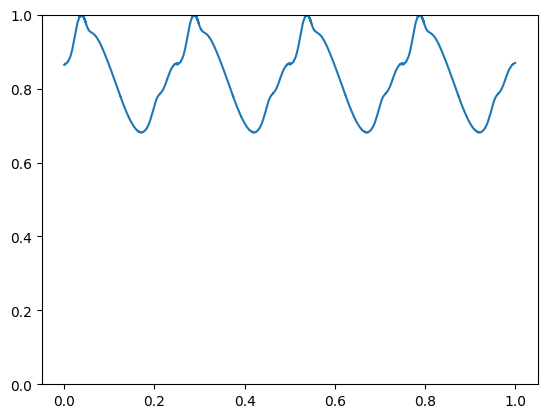

In [63]:
# Repeat 4 periods and normalise flux and time up to 1
periods = 4
flux_axis_period_norm = flux_axis_period/np.max(flux_axis_period)

time_axis = np.linspace(0,1,len(time_axis_period)*periods)
flux_axis = np.tile(flux_axis_period_norm, periods)
plt.plot(time_axis, flux_axis)
plt.ylim([0, 1])
plt.show()


In [65]:
# 4 periods duration
print("Duration: " + str(period*4))


Duration: 39.829683825459725 d


In [64]:
# Save 4 periods (time and flux normalised) to a CSV file
df = pd.DataFrame({"time" : time_axis, "flux" : flux_axis})
df.to_csv("cepheid_HD37350.csv", index=False)


In [60]:
# Generate WAV adio file from the 4 periods curve, 5 seconds duration

C4 = 261.6 # Hz
frequency_args = {
  'frequency_min' : C4,
  'frequency_max' : C4*4
}
duration_args = {
  'time_total' : 5000, # ms
}

Tone = SonifyTool(time_axis, flux_axis, duration_args = duration_args, frequency_args = frequency_args)
Tone.save(filename='cepheid_HD37350.wav')


c:\Users\AntonioOrtega\AppData\Local\Programs\Python\Python310\lib\site-packages\sonipy\thinkdsp.py:733: UserWarning: Can't add these waveforms; their time arrays don't line up.
  warnings.warn(


multitones created
Writing .\tones/cepheid.wav
Saved multitone as .\tones/cepheid.wav.
